# Principal Component Analysis with Cancer Data

In [155]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [157]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [158]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [159]:
temp = df[df.duplicated()]
temp
df.shape
temp.shape

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


(699, 11)

(8, 11)

In [160]:
df.drop_duplicates(inplace=True)
df.shape

(691, 11)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [161]:
df.shape
df.info()

(691, 11)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null object
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


In [162]:
# Convert bare nuclei to numeric

df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [163]:
temp = pd.DataFrame(df['Bare Nuclei'].str.isdigit())  # if the string is made of digits store True else False  in the hp column 
temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where hp has false

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [164]:
df['Bare Nuclei'].replace(('?', 1), inplace=True)
#df = df.apply(lambda x: x.fillna(x.mode()),axis=0)

In [165]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [166]:
# converting the hp column from object / string type to float
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int')  

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int64
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int64(11)
memory usage: 64.8 KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [168]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [169]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [170]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [171]:
df.drop('ID', axis=1, inplace=True)

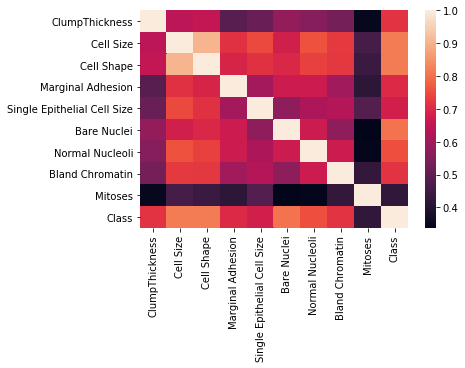

In [172]:
# Check for correlation of variable
sns.heatmap(df.corr())

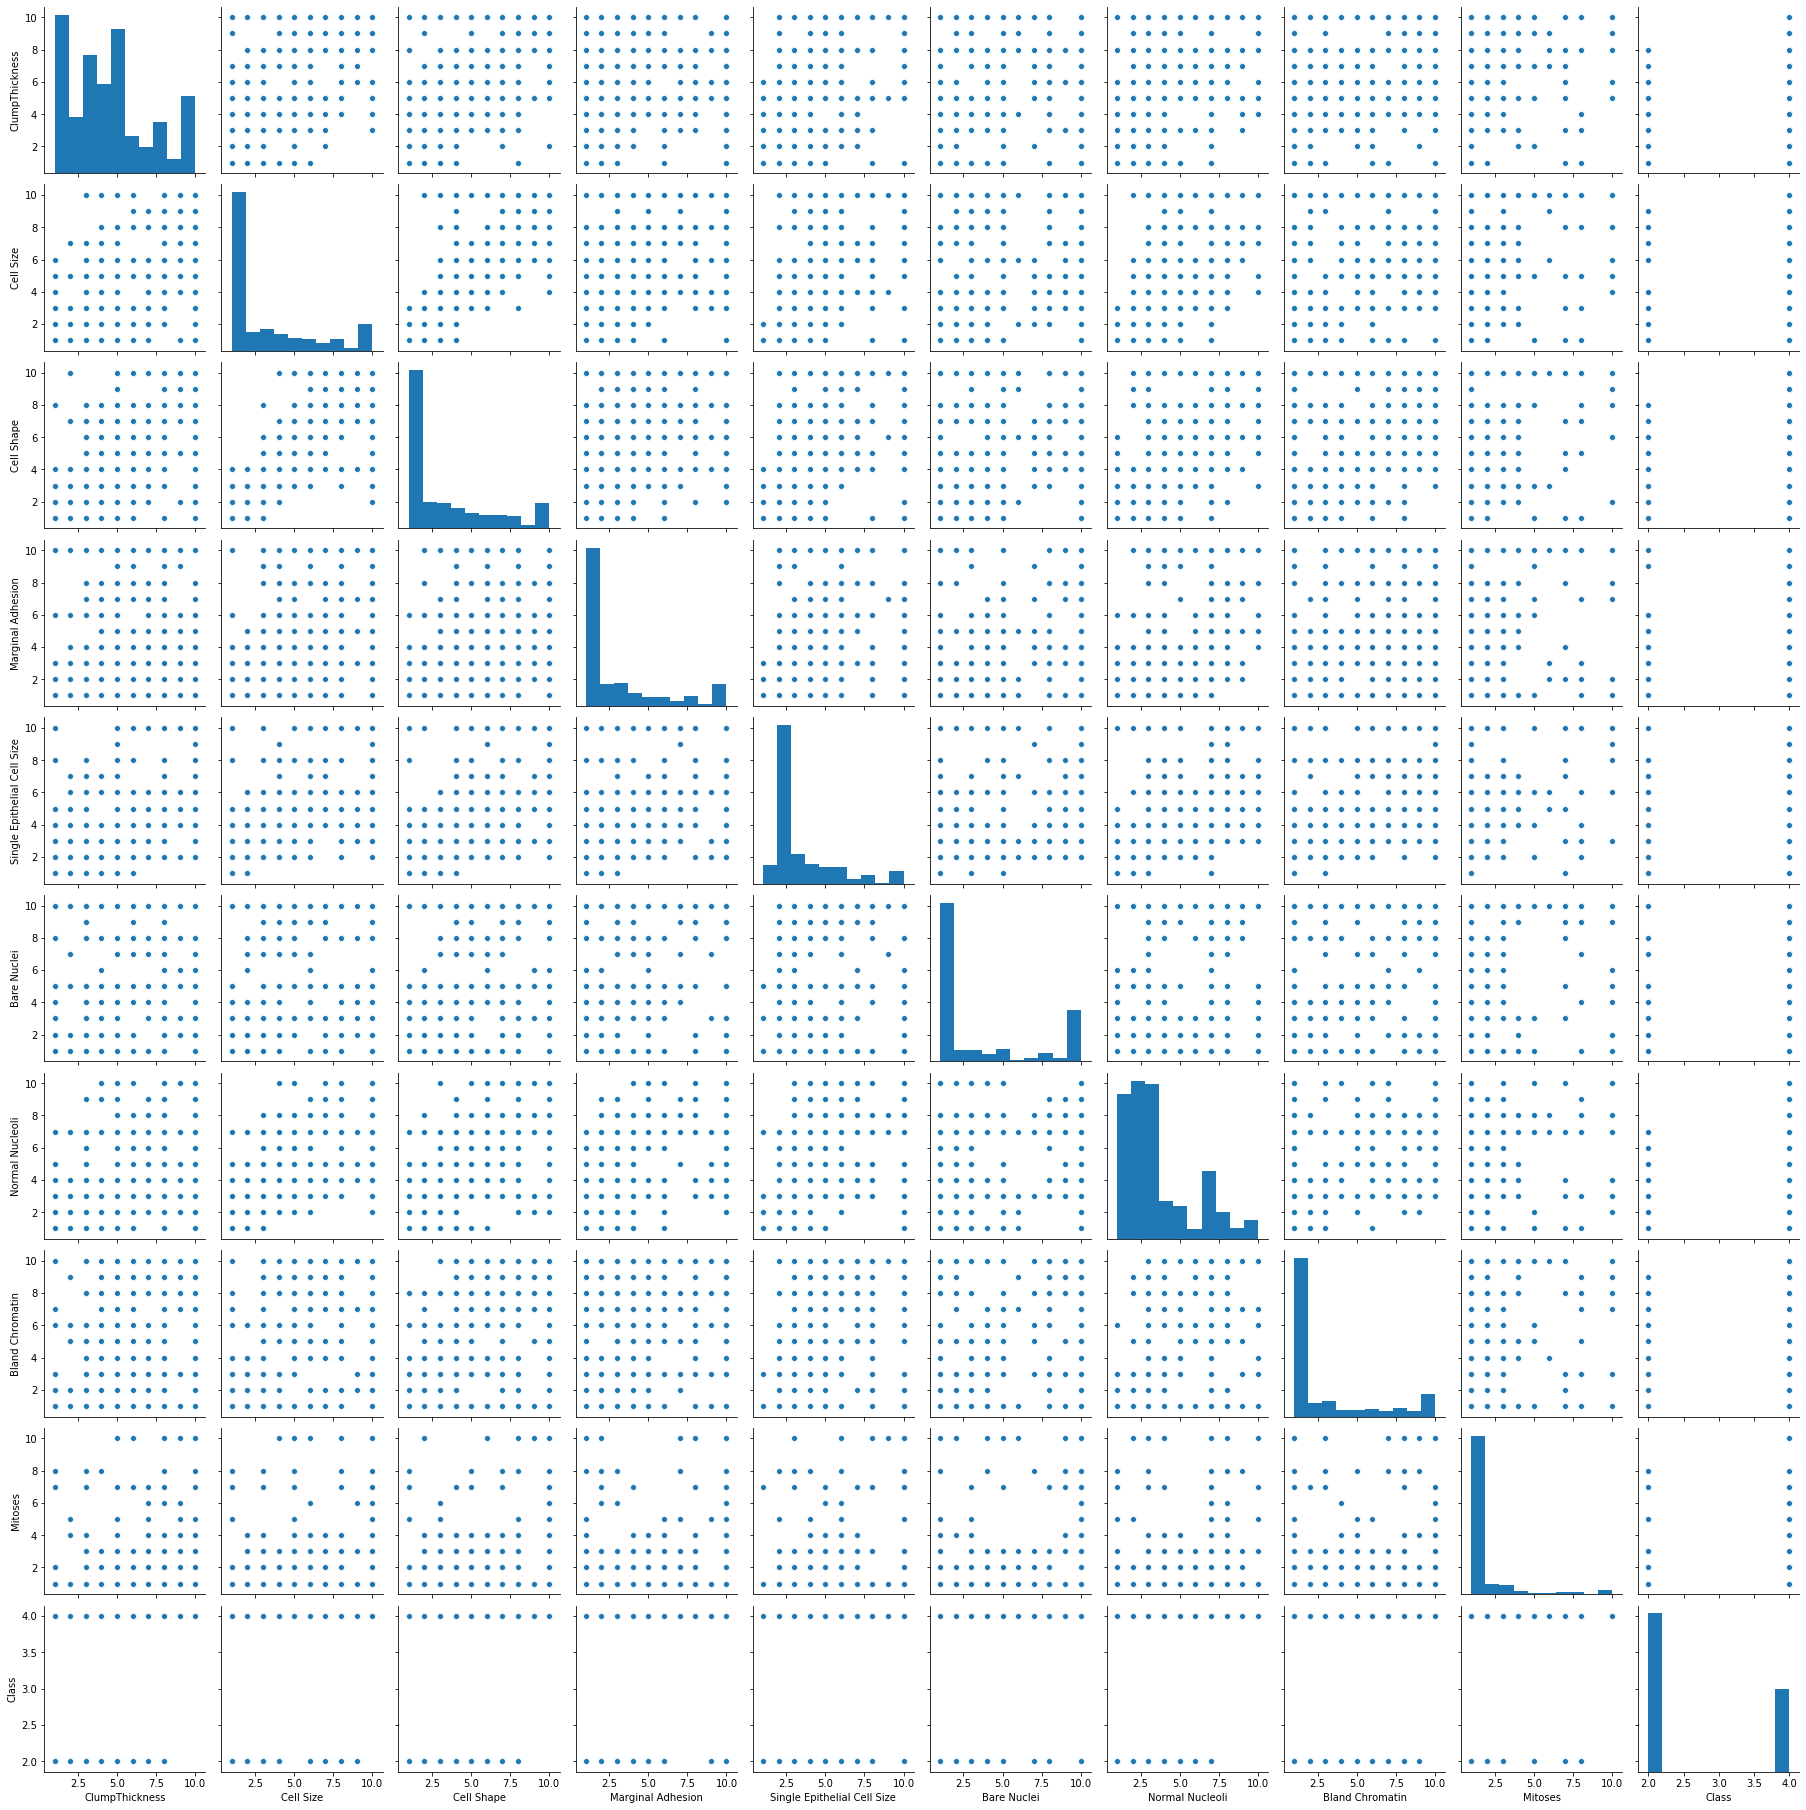

In [173]:
sns.pairplot(df)

In [174]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [175]:
#Let us check for pair plots

In [176]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [177]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


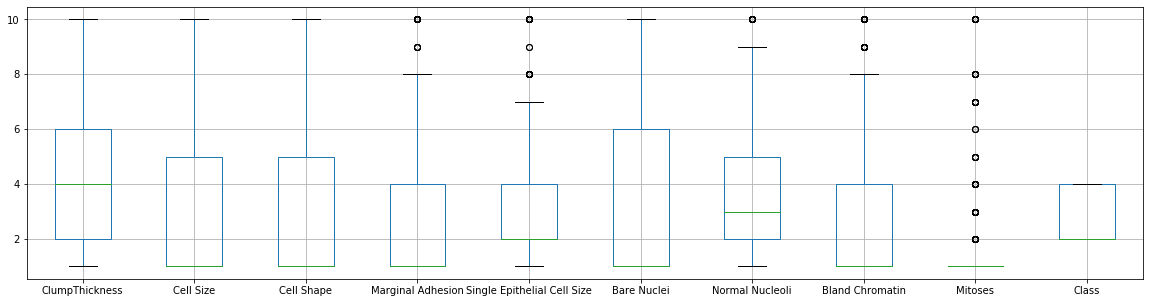

In [178]:
df.boxplot(figsize=(20,5))

In [179]:
print(df[['Marginal Adhesion',"Class"]].groupby('Marginal Adhesion').mean()) 

                      Class
Marginal Adhesion          
1                  2.154613
2                  2.678571
3                  2.931034
4                  3.696970
5                  3.652174
6                  3.636364
7                  4.000000
8                  4.000000
9                  3.600000
10                 3.963636


# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [180]:
# We could see most of the outliers are now removed.

In [181]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [182]:
df['Marginal Adhesion'] = np.where(df['Marginal Adhesion']>4, 4, df['Marginal Adhesion'])

In [183]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,15,161


In [184]:
pd.crosstab(df['Mitoses'], df['Class'])

Class,2,4
Mitoses,,
1,440,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [185]:
df['Mitoses'] = np.where(df['Mitoses']>3, 3, df['Mitoses'])
pd.crosstab(df['Mitoses'], df['Class'])

Class,2,4
Mitoses,,
1,440,132
2,8,27
3,5,79


In [186]:
pd.crosstab(df['Bland Chromatin'], df['Class'])

Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [187]:
df['Bland Chromatin'] = np.where(df['Bland Chromatin']>4, 4, df['Bland Chromatin'])
pd.crosstab(df['Bland Chromatin'], df['Class'])

Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,14,162


In [188]:
pd.crosstab(df['Normal Nucleoli'], df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [189]:
df['Normal Nucleoli'] = np.where(df['Normal Nucleoli']>4, 4, df['Mitoses'])
pd.crosstab(df['Normal Nucleoli'], df['Class'])

Class,2,4
Normal Nucleoli,,
1,430,42
2,6,11
3,5,23
4,12,162


In [190]:
pd.crosstab(df['Single Epithelial Cell Size'], df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [191]:
df['Single Epithelial Cell Size'] = np.where(df['Single Epithelial Cell Size']>3, 3, df['Mitoses'])
pd.crosstab(df['Single Epithelial Cell Size'], df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,421,41
2,7,12
3,25,185


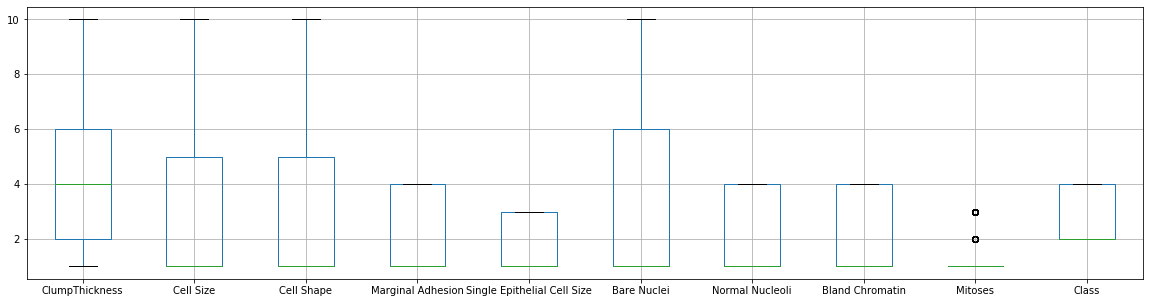

In [192]:
df.boxplot(figsize=(20,5))

In [193]:
# Standardize
from sklearn.preprocessing import StandardScaler

X = df.drop('Class', axis=1)
y = df['Class']
sc = StandardScaler()
X_std =  sc.fit_transform(X)   

# Q6 Create a covariance matrix for identifying Principal components

In [194]:
# PCA
# Step 1 - Create covariance matrix

train_cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.55352494 0.57595645 0.5851057
  0.59408342 0.57235583 0.42763818]
 [0.64427196 1.00144928 0.90673173 0.72226675 0.75457941 0.680334
  0.74123443 0.72704402 0.51118074]
 [0.65469961 0.90673173 1.00144928 0.70450554 0.72981558 0.69897265
  0.72223086 0.71932385 0.48189033]
 [0.55352494 0.72226675 0.70450554 1.00144928 0.67705493 0.69073358
  0.66629184 0.65353965 0.4249848 ]
 [0.57595645 0.75457941 0.72981558 0.67705493 1.00144928 0.66759182
  0.72421435 0.70354442 0.60801983]
 [0.5851057  0.680334   0.69897265 0.69073358 0.66759182 1.00144928
  0.70260545 0.63888037 0.44586387]
 [0.59408342 0.74123443 0.72223086 0.66629184 0.72421435 0.70260545
  1.00144928 0.67980806 0.56804007]
 [0.57235583 0.72704402 0.71932385 0.65353965 0.70354442 0.63888037
  0.67980806 1.00144928 0.49332325]
 [0.42763818 0.51118074 0.48189033 0.4249848  0.60801983 0.44586387
  0.56804007 0.49332325 1.00144928]]


# Q7 Identify eigen values and eigen vector

In [195]:
# Step 2- Get eigen values and eigen vector

In [196]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30212828  0.15842372 -0.89820784 -0.01834504  0.14730112  0.10605374
  -0.17075663  0.08771971  0.08190839]
 [-0.36510386  0.14267338  0.0140481  -0.72306279 -0.40131578 -0.35768977
   0.10818907 -0.11433606 -0.09773636]
 [-0.36146985  0.19773341 -0.02879622  0.68138425 -0.37309246 -0.34721046
   0.17486404 -0.1621069  -0.22026841]
 [-0.33158252  0.24538385  0.32269968  0.04707001  0.2531738  -0.16763893
  -0.7454977  -0.15599967  0.22624461]
 [-0.34953215 -0.184789    0.16563935  0.04575877 -0.09662648  0.00921474
  -0.06216414  0.89437929 -0.03081819]
 [-0.33193762  0.18499221  0.15156606 -0.07820124  0.66147124  0.08854083
   0.323294   -0.0406182  -0.52436158]
 [-0.34740399 -0.09298058  0.09702263  0.04354695  0.19367689 -0.013744
   0.48739163 -0.09409955  0.75845263]
 [-0.33629485  0.04050327  0.14655567 -0.00423322 -0.35292409  0.83221022
  -0.05449992 -0.20228298 -0.05244866]
 [-0.26205188 -0.88123748 -0.08222171  0.01483337  0.07075346 -0.10707742
  -0.1

In [197]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(6.171055039738078,
  array([-0.30212828,  0.15842372, -0.89820784, -0.01834504,  0.14730112,
          0.10605374, -0.17075663,  0.08771971,  0.08190839])),
 (0.6865050991895139,
  array([-0.36510386,  0.14267338,  0.0140481 , -0.72306279, -0.40131578,
         -0.35768977,  0.10818907, -0.11433606, -0.09773636])),
 (0.490137945965781,
  array([-0.36146985,  0.19773341, -0.02879622,  0.68138425, -0.37309246,
         -0.34721046,  0.17486404, -0.1621069 , -0.22026841])),
 (0.4041348845570229,
  array([-0.34953215, -0.184789  ,  0.16563935,  0.04575877, -0.09662648,
          0.00921474, -0.06216414,  0.89437929, -0.03081819])),
 (0.3312000328813752,
  array([-0.33193762,  0.18499221,  0.15156606, -0.07820124,  0.66147124,
          0.08854083,  0.323294  , -0.0406182 , -0.52436158])),
 (0.31535858674749545,
  array([-0.34740399, -0.09298058,  0.09702263,  0.04354695,  0.19367689,
         -0.013744  ,  0.48739163, -0.09409955,  0.75845263])),
 (0.266907904703491,
  array([-0.26205188

In [198]:

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[6.171055039738078, 0.6865050991895139, 0.490137945965781, 0.4041348845570229, 0.3312000328813752, 0.31535858674749545, 0.266907904703491, 0.25647789152247696, 0.09126609295564657]


In [199]:
tot = sum(eigenvalues)

#%age of total var_explained
var_explained = [(i / tot) for i in train_eigvalues_sorted] 
#%age of total var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 


# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 7 entries with 7th entry 
# cumulative reaching almost 100%



In [200]:
print(var_explained)

[0.6846804916255456, 0.07616795601234345, 0.05438095879022165, 0.04483889216020991, 0.03674674749769233, 0.034989134081970026, 0.029613515717222795, 0.028456302484404065, 0.010126001630390104]


In [201]:
print(cum_var_exp)

[0.68468049 0.76084845 0.81522941 0.8600683  0.89681505 0.93180418
 0.9614177  0.989874   1.        ]


# Q8 Find variance and cumulative variance by each eigen vector

<BarContainer object of 9 artists>

Text(0, 0.5, 'Explained variance ratio')

Text(0.5, 0, 'Principal components')

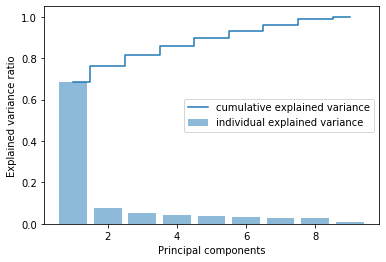

In [202]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [203]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:5])   # Reducing from 8 to 4 dimension space

X_std_6D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_6D)  # converting array to dataframe for pairplot


In [204]:
Proj_data_df = Proj_data_df.join(y)

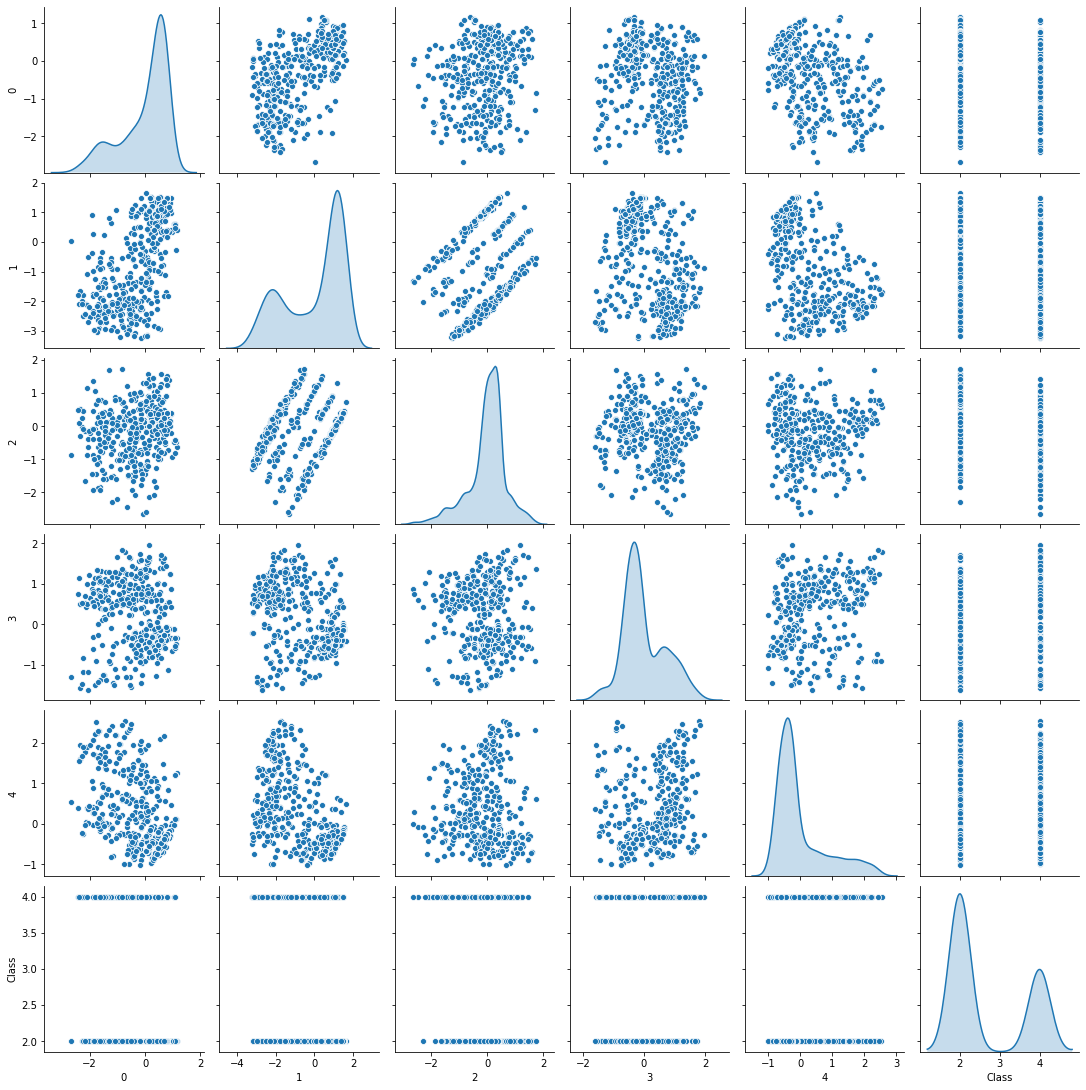

In [205]:
#Let us check it visually
#Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_df, diag_kind='kde') 

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [206]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6'])

In [207]:
finalDf = pd.concat([principalDf, df[['Class']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Class
0,-3.805689,0.738680,2.012548,-0.178257,0.296154,0.107712,2.0
1,4.894477,-4.546450,0.087343,-0.470789,0.673957,-1.722080,2.0
2,-4.010622,-0.704257,0.320296,-0.228684,0.316480,0.187011,2.0
3,5.348744,3.501726,-1.891529,-1.871549,0.664340,0.907608,2.0
4,-3.829793,0.379111,1.026602,0.529698,-0.124487,-1.627343,2.0


# Q10 Find correlation between components and features

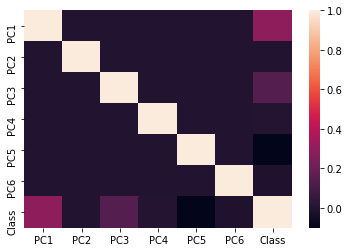

In [208]:
sns.heatmap(finalDf.corr())

In [209]:
df_comp = pd.DataFrame(pca.components_, columns=list(X))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.375325,0.477836,0.467373,0.175610,0.125546,0.545717,0.182461,0.175165,0.063121
1,0.313786,0.366760,0.315303,-0.022892,0.017666,-0.815365,-0.009180,0.040305,0.015657
2,0.869700,-0.365533,-0.314591,-0.058123,-0.041676,0.047149,-0.032443,-0.051452,-0.001311
3,-0.035797,0.255734,-0.617106,0.336079,0.234402,-0.122020,0.399857,0.412721,0.198727
4,0.049441,0.646573,-0.437074,-0.185600,-0.132486,0.119208,-0.245513,-0.501790,-0.100922
5,-0.018225,0.047202,-0.012899,-0.876640,0.080873,0.042851,0.387174,0.149815,0.219206


<Figure size 864x432 with 0 Axes>

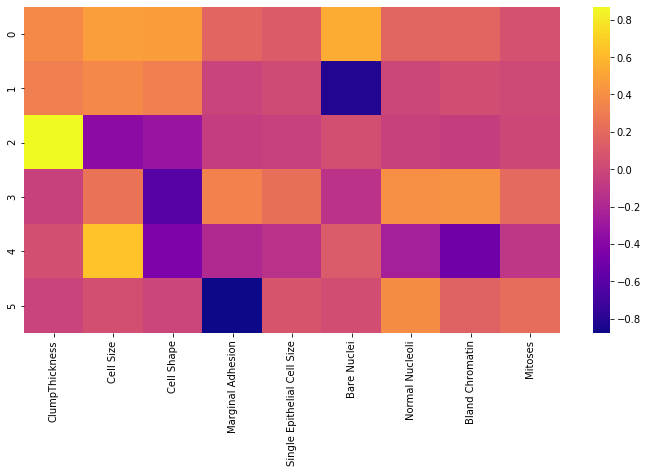

In [210]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')